# Figure 02: Ground state

In this notebook, two data points from Figure 2 in

[Beg *et al.* Ground state search, hysteretic behaviour and reversal mechanism of skyrmionic textures in confined helimagnetic nanostructures. *Scientific Reports* **5**, 17137 (2015).](https://doi.org/10.1038/s41598-019-44462-2).

where an incomplete Skyrmion (iSk) and isolated Skyrmion (Sk) are simulated. This provides all the information to start with to fully create Figure 2.

We are going to simulate two points from the parameter space:

- $(d, \mu_{0}H) = (80\,\text{nm}, 0.4\,\text{T})$
- $(d, \mu_{0}H) = (150\,\text{nm}, 0.4\,\text{T})$

The first value is the disk diameter with thickness $10\,\text{nm}$ and the second value is an external magnetic field applied in the out-of-plane direction.

We are going to relax the system starting from the uniform state. The function to simulate a single point is the parameter space is:

In [1]:
import oommfc as oc
import discretisedfield as df
%matplotlib inline

def parameter_space_point(d, B, initial_state):
    thickness = 10e-9
    cell = (2.5e-9, 2.5e-9, 2.5e-9)
    p1 = (-d/2, -d/2, -thickness/2)
    p2 = (d/2, d/2, thickness/2)
    mesh = oc.Mesh(p1=p1, p2=p2, cell=cell)
    
    D = 1.58e-3
    Ms = 3.84e5
    A = 8.78e-12

    def Ms_fun(pos):
        x, y, z = pos
        if x**2 + y**2 <= (d/2)**2:
            return Ms
        else:
            return 0

    def m_fun(pos):
        x, y, z = pos
        if x**2 + y**2 <= (d/4)**2:
            return (0, 0, -1)
        else:
            return (0, 0, 1)
        
    if initial_state == 'skyrmion':
        value = m_fun
    elif initial_state == 'uniform':
        value = (0, 0, 1)
        
    system = oc.System(name='parameter-space-point')
    system.hamiltonian = oc.Exchange(A=A) + oc.DMI(D=D, crystalclass='T') + oc.Demag() + \
        oc.Zeeman(H=(0, 0, B/oc.consts.mu0))
    system.m = df.Field(mesh, dim=3, value=value, norm=Ms_fun)
    
    md = oc.MinDriver()
    md.drive(system, overwrite=True)
    
    return system

The first point is:

In [2]:
system1 = parameter_space_point(80e-9, 0.4, initial_state='uniform')

2019/11/26 15:18: Running OOMMF (parameter-space-point.mif) ... (1.1 s)


The magnetisation is

In [3]:
system1.m.plane(z=0, n=(20, 20)).k3d_vectors(color_field=system1.m.z, head_size=20)

Output()

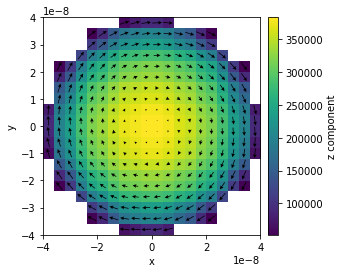

In [5]:
system1.m.plane(z=0, n=(20, 20)).mpl()

And we can see that this point is the incomplete Skyrmion state. Similarly, the second point is:

In [4]:
system2 = parameter_space_point(150e-9, 0.4, initial_state='skyrmion')
system2.m.plane(z=0, n=(30, 30)).k3d_vectors(color_field=system2.m.z, head_size=20)

2019/11/26 15:18: Running OOMMF (parameter-space-point.mif) ... (1.8 s)


Output()

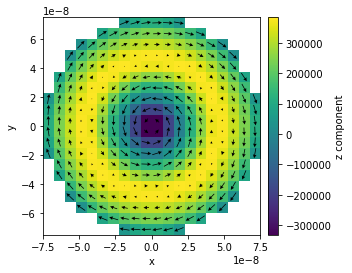

In [6]:
system2.m.plane(z=0, n=(20, 20)).mpl()